In [1]:
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [3]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [4]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
print(iris.data[0:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [6]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [7]:
import pandas as pd

In [8]:
data = pd.DataFrame({'sepal length' : iris.data[:,0],
                    'sepal width' : iris.data[:,1],
                    'petal length' : iris.data[:, 2],
                    'petal width' : iris.data[:, 3],
                    'species' : iris.target})

In [9]:
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
data.shape

(150, 5)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   species       150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [12]:
data.describe()

,sepal length,sepal width,petal length,petal width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = data[['sepal length', 'sepal width', 'petal length', 'petal width']] # Features

In [15]:
y = data['species'] # Labels

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
clf = RandomForestClassifier(n_estimators = 100)

In [19]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
y_pred = clf.predict(X_test)

In [21]:
from sklearn import metrics

In [22]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.9555555555555556


In [23]:
clf.predict([[3, 5, 4, 2]])

array([2])

In [24]:
# 2nd Random Forest Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
clf2 = RandomForestClassifier(n_estimators=100)

In [27]:
clf2.fit(X_train, y_train)

RandomForestClassifier()

In [28]:
import pandas as pd

In [30]:
feature_imp = pd.Series(clf2.feature_importances_, index = iris.feature_names).sort_values(ascending=False)

In [31]:
feature_imp

petal width (cm)     0.434511
petal length (cm)    0.427478
sepal length (cm)    0.107957
sepal width (cm)     0.030054
dtype: float64

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

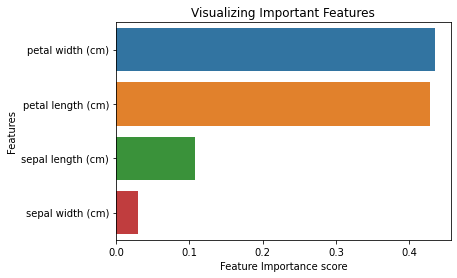

In [38]:
sns.barplot(x = feature_imp, y = feature_imp.index)
plt.xlabel('Feature Importance score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
# plt.legend()
plt.show()